In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
nhlspending_2023 = pd.read_csv("/Users/michelleholmes/Desktop/2023teamspendingNHL.csv")
nhlspending_2022 = pd.read_csv("/Users/michelleholmes/Desktop/2022-2021SPENINDNHL.csv")
nhlspending_2021 = pd.read_csv("/Users/michelleholmes/Desktop/2020NHLSPENDING.csv")
nhlspending_2020 = pd.read_csv("/Users/michelleholmes/Desktop/2019NHLSPENDING.csv")

In [9]:
combined_df = pd.concat([nhlspending_2023, nhlspending_2022, nhlspending_2021, nhlspending_2020])

combined_df['FORWARD CASH'] = pd.to_numeric(combined_df['FORWARD CASH'], errors='coerce')
combined_df['DEFENSE CASH'] = pd.to_numeric(combined_df['DEFENSE CASH'], errors='coerce')

In [10]:
team_spending = combined_df.groupby('TEAM')[['FORWARD CASH', 'DEFENSE CASH']].sum()

team_spending['TOTAL SPENDING'] = team_spending.sum(axis=1)

top_spending_teams = team_spending.nlargest(10, 'TOTAL SPENDING')

In [11]:
top_spending_teams['MORE SPENDING'] = 'FORWARDS'
top_spending_teams.loc[top_spending_teams['FORWARD CASH'] < top_spending_teams['DEFENSE CASH'], 'MORE SPENDING'] = 'DEFENSE'

Plot saved as top_spending_teams_forward_vs_defense_spending_plot.png


<Figure size 1200x800 with 0 Axes>

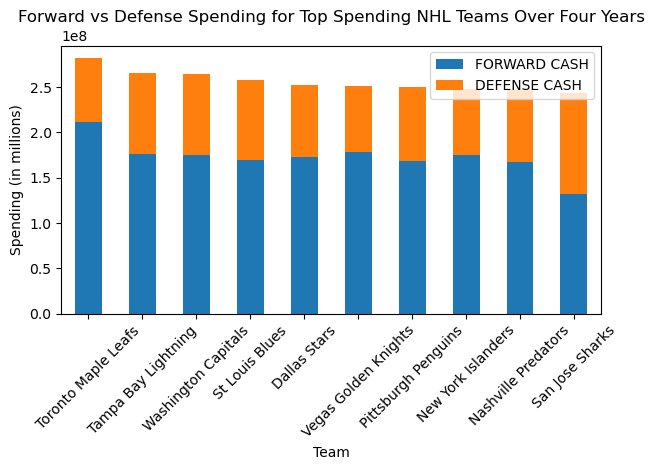


Comparison of spending between forwards and defense for the top spending teams:
                      FORWARD CASH  DEFENSE CASH MORE SPENDING
TEAM                                                          
Toronto Maple Leafs    211656238.0    70220231.0      FORWARDS
Tampa Bay Lightning    176006254.0    89196008.0      FORWARDS
Washington Capitals    174607408.0    89836416.0      FORWARDS
St Louis Blues         169196002.0    88435173.0      FORWARDS
Dallas Stars           172431173.0    80239599.0      FORWARDS
Vegas Golden Knights   178106531.0    73374808.0      FORWARDS
Pittsburgh Penguins    168321060.0    81933041.0      FORWARDS
New York Islanders     175602110.0    72412452.0      FORWARDS
Nashville Predators    167837382.0    79268939.0      FORWARDS
San Jose Sharks        132444780.0   111634723.0      FORWARDS


In [12]:
plt.figure(figsize=(12, 8))
top_spending_teams[['FORWARD CASH', 'DEFENSE CASH']].plot(kind='bar', stacked=True)
plt.title('Forward vs Defense Spending for Top Spending NHL Teams Over Four Years')
plt.xlabel('Team')
plt.ylabel('Spending (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("/Users/michelleholmes//Desktop/top_spending_teams_forward_vs_defense_spending_plot.png")

print("Plot saved as top_spending_teams_forward_vs_defense_spending_plot.png")

plt.show()

print("\nComparison of spending between forwards and defense for the top spending teams:")
print(top_spending_teams[['FORWARD CASH', 'DEFENSE CASH', 'MORE SPENDING']])